In [1]:
show = True

### SafetyPointGoal1-v0

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import seaborn as sns
import os
import matplotlib as mpl
cmap = plt.get_cmap('tab10')

runs = ['SAC-WC','PPO-lag','PPO-WC','SIM','SIM-WC']
num_seed=4
save_path = './figures/SafetyPointGoal1-v0'
constraint = 18
step_size = 50000

run_dirs = {
    'SAC-WC'               :'.\log_data\SafetyPointGoal1-v0\SAC-WC',
    'PPO-lag'               :'.\log_data\SafetyPointGoal1-v0\PPO-lag',
    'SIM'      :'.\log_data\SafetyPointGoal1-v0\SIM',
    'PPO-WC'                :'.\log_data\SafetyPointGoal1-v0\PPO-WC',
    'SIM-WC'       :'.\log_data\SafetyPointGoal1-v0\SIM-WC',
}

num_seeds = {
    'SAC-WC'      :4,
    'PPO-lag'      :6,
    'SIM'      :6,
    'PPO-WC'      :4,
    'SIM-WC'      :4,
}


run_colors = {
    'SAC-WC'                :cmap.colors[5],
    'PPO-lag'               :cmap.colors[4],
    'PPO-WC'                :cmap.colors[2],
    'SIM-WC'       :cmap.colors[3],
    'SIM'      :cmap.colors[0],
}

run_labels = {
    'SAC-WC'               :'WCSAC',
    'PPO-lag'               :'PPO-lag',
    'SIM'      :'SIM',
    'PPO-WC'                :'PPO-lag (CVaR)',
    'SIM-WC'       :'SIM (CVaR)',
}

line_widths = {
    'SAC-WC'      :3,
    'PPO-lag'      :3,
    'SIM'      :4,
    'PPO-WC'      :3,
    'SIM-WC'      :4,
}

run_lines = {
    'SAC-WC'               :'-',
    'PPO-lag'               :'-',
    'SIM'      :'-',
    'PPO-WC'                :'-',
    'SIM-WC':'-',
}

def lpf(arr, weight=0.8):
  filtered_arr = arr
  for i in range(1, len(arr)):
    filtered_arr[i] = weight*arr[i - 1] + (1 - weight)*arr[i]
  return filtered_arr


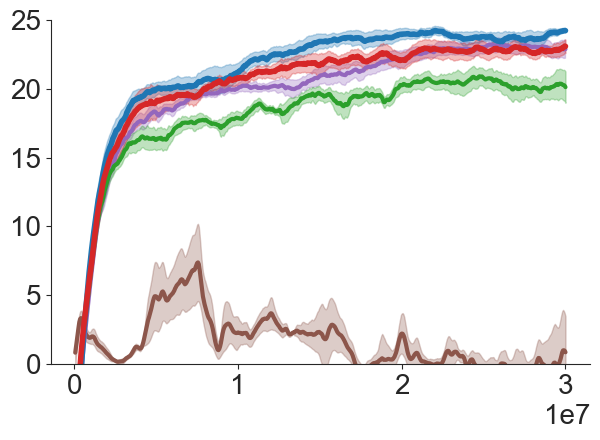

In [3]:
plt.clf()
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
SMALL_SIZE = 20
mpl.rc('font', size=SMALL_SIZE)
mpl.rc('axes', titlesize=SMALL_SIZE)
sns.set_style('ticks')
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

for run in runs:
    run_dir = run_dirs[run]
    run_color = run_colors[run]
    run_label = run_labels[run]
    run_line = run_lines[run]
    line_width = line_widths[run]
    avg_return = []
    avg_cost = []
    num_seed = num_seeds[run]
    for seed in range(num_seed):
        return_path = os.path.join(run_dir,f'return_{seed}.txt')
        with open(return_path) as f:
            return_arr = np.array([float(line.split('\n')[0]) for line in f.readlines()])

        avg_return.append(lpf(return_arr))
    avg_return = np.array(avg_return)
    return_mean = np.mean(avg_return,axis=0)
    return_std = stats.sem(avg_return, axis=0)
    pos = np.arange(step_size, (len(return_mean)+1)*step_size, step_size)
    plt.plot(pos, return_mean, color=run_color, linestyle=run_line, linewidth=line_width, label=run_label)
    plt.fill_between(pos, return_mean - return_std, return_mean + return_std, color=run_color, alpha=0.3)

bottom, top = plt.ylim() # return the current ylim
plt.ylim((0, 25)) # set the ylim to bottom, top
plt.ylim(0, 25) # set the ylim to bottom, top


plt.tight_layout()
if (show):
    plt.show('svg')
else:
    fig_path = os.path.join(save_path, f'CVaR_Return.pdf')
    plt.savefig(fig_path,dpi=600)
    print(f'save figure at {fig_path}')

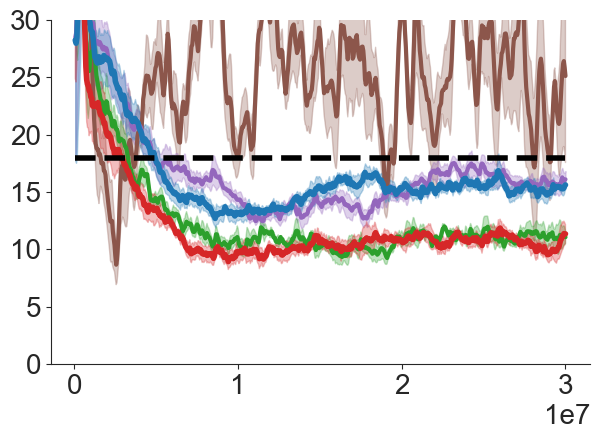

In [4]:
plt.clf()
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
SMALL_SIZE = 20
mpl.rc('font', size=SMALL_SIZE)
mpl.rc('axes', titlesize=SMALL_SIZE)
sns.set_style('ticks')
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
for run in runs:
    run_dir = run_dirs[run]
    run_color = run_colors[run]
    run_label = run_labels[run]
    run_line = run_lines[run]
    line_width = line_widths[run]

    avg_return = []
    avg_cost = []
    num_seed=num_seeds[run]
    for seed in range(num_seed):
        cost_path = os.path.join(run_dir,f'cost_{seed}.txt')
        with open(cost_path) as f:
            cost_path = np.array([float(line.split('\n')[0]) for line in f.readlines()])
        avg_cost.append(lpf(cost_path))
    avg_cost = np.array(avg_cost)

    cost_mean = np.mean(avg_cost,axis=0)
    cost_std = stats.sem(avg_cost, axis=0)
    pos = np.arange(step_size, (len(return_mean)+1)*step_size, step_size)
    plt.plot(pos, cost_mean, color=run_color, linestyle=run_line, linewidth=line_width, label=run_label)
    plt.fill_between(pos, cost_mean - cost_std, cost_mean + cost_std, color=run_color, alpha=0.3)

pos = np.arange(step_size, (len(return_mean)+1)*step_size, step_size)
plt.plot(pos, [constraint for _ in range(len(return_mean))], color='black', linestyle='--', linewidth=4
, label='Constraint')

bottom, top = plt.ylim() # return the current ylim
plt.ylim((0, 30)) # set the ylim to bottom, top
plt.ylim(0, 30) # set the ylim to bottom, top

plt.tight_layout()
if (show):
    plt.show('svg')
else:
    fig_path = os.path.join(save_path, f'CVaR_cost.pdf')
    plt.savefig(fig_path,dpi=600)
    print(f'save figure at {fig_path}')

### SafetyCarGoal1-v0

In [5]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import seaborn as sns
import os
import matplotlib as mpl
cmap = plt.get_cmap('tab10')

runs = ['SAC-WC','PPO-lag','PPO-WC','SIM','SIM-WC']
save_path = './figures/SafetyCarGoal1-v0'
constraint = 18
step_size = 50000

run_dirs = {
    'SAC-WC'               :'.\log_data\SafetyCarGoal1-v0\SAC-WC',
    'PPO-lag'               :'.\log_data\SafetyCarGoal1-v0\PPO-lag',
    'SIM'      :'.\log_data\SafetyCarGoal1-v0\SIM',
    'PPO-WC'                :'.\log_data\SafetyCarGoal1-v0\PPO-WC',
    'SIM-WC'       :'.\log_data\SafetyCarGoal1-v0\SIM-WC',
}

num_seeds = {
    'SAC-WC'      :4,
    'PPO-lag'      :6,
    'SIM'      :6,
    'PPO-WC'      :4,
    'SIM-WC'      :4,
}


run_colors = {
    'SAC-WC'                :cmap.colors[5],
    'PPO-lag'               :cmap.colors[4],
    'PPO-WC'                :cmap.colors[2],
    'SIM-WC'       :cmap.colors[3],
    'SIM'      :cmap.colors[0],
}

run_labels = {
    'SAC-WC'               :'WCSAC',
    'PPO-lag'               :'PPO-lag',
    'SIM'      :'SIM',
    'PPO-WC'                :'PPO-lag (CVaR)',
    'SIM-WC':                  'SIM (CVaR)',
}

line_widths = {
    'SAC-WC'      :3,
    'PPO-lag'      :3,
    'SIM'      :4,
    'PPO-WC'      :3,
    'SIM-WC' :3,
}

run_lines = {
    'SAC-WC'               :'-',
    'PPO-lag'               :'-',
    'SIM'      :'-',
    'PPO-WC'                :'-',
    'SIM-WC'       :'-',
}

def lpf(arr, weight=0.8):
  filtered_arr = arr
  for i in range(1, len(arr)):
    filtered_arr[i] = weight*arr[i - 1] + (1 - weight)*arr[i]
  return filtered_arr


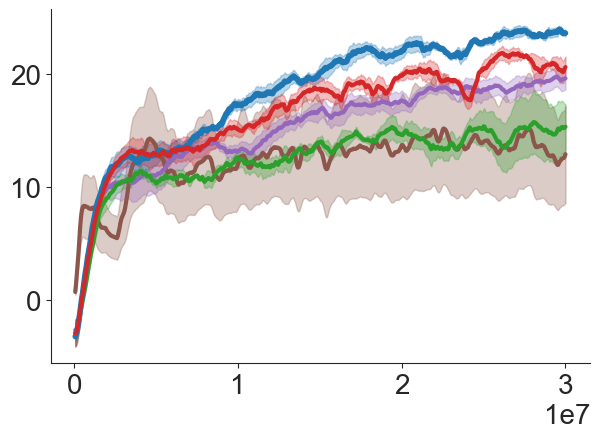

In [6]:
plt.clf()
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
SMALL_SIZE = 20
mpl.rc('font', size=SMALL_SIZE)
mpl.rc('axes', titlesize=SMALL_SIZE)
sns.set_style('ticks')
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

for run in runs:
    run_dir = run_dirs[run]
    run_color = run_colors[run]
    run_label = run_labels[run]
    run_line = run_lines[run]
    line_width = line_widths[run]
    avg_return = []
    avg_cost = []
    num_seed = num_seeds[run]
    for seed in range(num_seed):
        return_path = os.path.join(run_dir,f'return_{seed}.txt')
        with open(return_path) as f:
            return_arr = np.array([float(line.split('\n')[0]) for line in f.readlines()])

        avg_return.append(lpf(return_arr))
    avg_return = np.array(avg_return)
    return_mean = np.mean(avg_return,axis=0)
    return_std = stats.sem(avg_return, axis=0)
    pos = np.arange(step_size, (len(return_mean)+1)*step_size, step_size)
    plt.plot(pos, return_mean, color=run_color, linestyle=run_line, linewidth=line_width, label=run_label)
    plt.fill_between(pos, return_mean - return_std, return_mean + return_std, color=run_color, alpha=0.3)

plt.tight_layout()
if (show):
    plt.show('svg')
else:
    fig_path = os.path.join(save_path, f'CVaR_Return.pdf')
    plt.savefig(fig_path,dpi=600)
    print(f'save figure at {fig_path}')

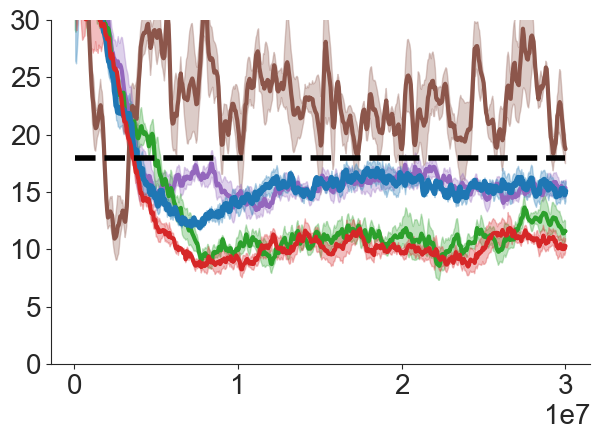

In [7]:
plt.clf()
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
SMALL_SIZE = 20
mpl.rc('font', size=SMALL_SIZE)
mpl.rc('axes', titlesize=SMALL_SIZE)
sns.set_style('ticks')
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
for run in runs:
    run_dir = run_dirs[run]
    run_color = run_colors[run]
    run_label = run_labels[run]
    run_line = run_lines[run]
    line_width = line_widths[run]

    avg_return = []
    avg_cost = []

    num_seed=num_seeds[run]
    for seed in range(num_seed):
        cost_path = os.path.join(run_dir,f'cost_{seed}.txt')
        with open(cost_path) as f:
            cost_path = np.array([float(line.split('\n')[0]) for line in f.readlines()])
        avg_cost.append(lpf(cost_path))
    avg_cost = np.array(avg_cost)

    cost_mean = np.mean(avg_cost,axis=0)
    cost_std = stats.sem(avg_cost, axis=0)
    pos = np.arange(step_size, (len(return_mean)+1)*step_size, step_size)
    plt.plot(pos, cost_mean, color=run_color, linestyle=run_line, linewidth=line_width, label=run_label)
    plt.fill_between(pos, cost_mean - cost_std, cost_mean + cost_std, color=run_color, alpha=0.3)

pos = np.arange(step_size, (len(return_mean)+1)*step_size, step_size)
plt.plot(pos, [constraint for _ in range(len(return_mean))], color='black', linestyle='--', linewidth=4
, label='Constraint')

bottom, top = plt.ylim() # return the current ylim
plt.ylim((0, 30)) # set the ylim to bottom, top
plt.ylim(0, 30) # set the ylim to bottom, top


plt.tight_layout()
if (show):
    plt.show('svg')
else:
    fig_path = os.path.join(save_path, f'CVaR_cost.pdf')
    plt.savefig(fig_path,dpi=600)
    print(f'save figure at {fig_path}')

In [8]:
# import matplotlib.pyplot as plt
# from matplotlib.lines import Line2D
# plt.clf()
# mpl.rcParams['pdf.fonttype'] = 42
# mpl.rcParams['ps.fonttype'] = 42
# SMALL_SIZE = 20
# mpl.rc('font', size=SMALL_SIZE)
# mpl.rc('axes', titlesize=SMALL_SIZE)
# sns.set_style('ticks')
# mpl.rcParams['axes.spines.top'] = False
# mpl.rcParams['axes.spines.right'] = False
# # Create an empty figure without any axes
# fig, ax = plt.subplots(figsize=(1, 1))  # Adjust the figsize as needed
# ax.axis('off')  # Turn off the axes to hide the plot table

# cmap = plt.get_cmap('tab10')
# # Define the legend labels and colors
# runs = ['PPO-lag','SIM','PPO-WC','SIM-WC','constraint']

# run_colors = {
#     'SAC-WC'                :cmap.colors[5],
#     'PPO-lag'               :cmap.colors[4],
#     'PPO-WC'                :cmap.colors[2],
#     'SIM-WC'       :cmap.colors[3],
#     'SIM'      :cmap.colors[0],
#     'constraint'            :'black',
# }

# run_labels = {
#     'SAC-WC'               :'WCSAC',
#     'PPO-lag'               :'PPO-lag',
#     'SIM'      :'SIM',
#     'PPO-WC'                :'PPO-lag (CVaR)',
#     'SIM-WC':'SIM (CVaR)',
#     'constraint'            :'Constraint',
# }

# run_linestyles = {
#     'SAC-WC'               :'-',
#     'PPO-lag'               :'-',
#     'SIM'      :'-',
#     'PPO-WC'                :'-',
#     'SIM-WC':'-',
#     'constraint': '--',
# }

# # Create a custom legend with increased line length (handlelength)
# legend_elements = [Line2D([0], [0], color=run_colors[run], linestyle=run_linestyles[run],linewidth=5.0) for run in runs]
# ax.legend(legend_elements, [run_labels[run] for run in runs], ncol=3, handlelength=2)  # Adjust handlelength as desired

# # fig.update_layout(template='simple_white')
# # Save the figure as a pdf (or any other desired format) without any extra padding
# plt.savefig('CVaR_legend_bar.pdf', bbox_inches='tight', pad_inches=0, dpi=600)

# # Display the figure interactively (optional)
# # plt.show('svg')